# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Gregorius Marcellinus Ongkosianbhadra
- **Email:** marcellongkosianbhadra@gmail.com
- **ID Dicoding:** gregorius1414

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara saat ini dibandingkan dengan standar kualitas udara yang ditetapkan oleh pemerintah, dan apakah terdapat tren musiman dalam data kualitas udara yang menunjukkan perubahan signifikan dalam periode tertentu?
- Apa dampak dari aktivitas industri utama di wilayah ini terhadap kualitas udara, dan apakah terdapat pola hubungan antara jenis industri tertentu dan tingkat polusi udara yang terukur?

## Import Semua Packages/Library yang Digunakan

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [74]:
file_path = r'C:\Users\ASUS\Dicoding\data\PRSA_Data_Guanyuan_20130301-20170228.csv'
df = pd.read_csv(file_path)

### Assessing Data

In [61]:
initial_assessment = df.head()
initial_columns = df.columns
initial_datatypes = df.dtypes



initial_assessment, initial_columns, initial_datatypes

(   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
 1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
 2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
 3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
 4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   
 
      PRES  DEWP  RAIN   wd  WSPM   station  
 0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
 1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
 2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
 3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
 4  1025.2 -19.5   0.0    N   2.0  Guanyuan  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month        int64
 day          

### Cleaning Data

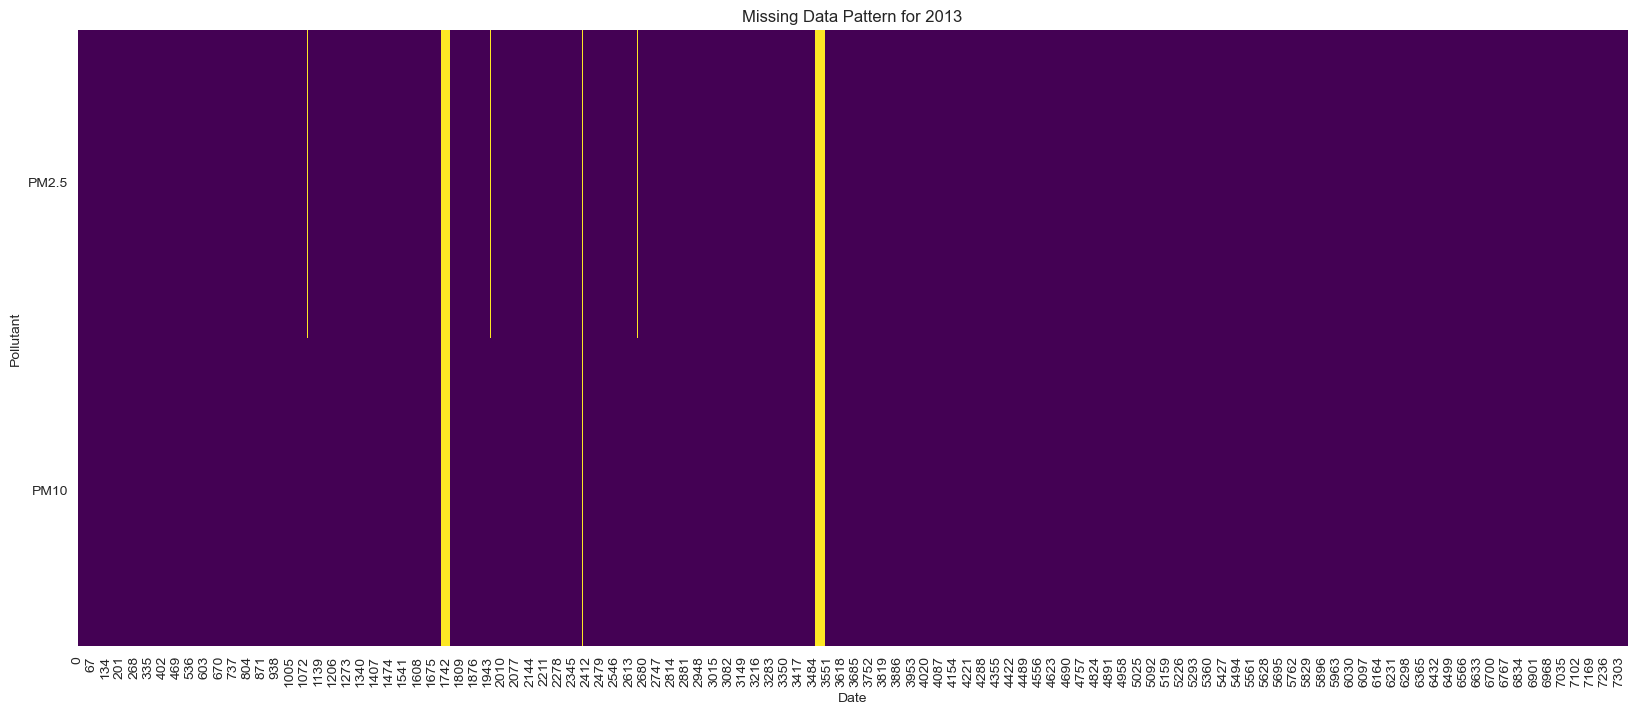

(No         0.000000
 year       0.000000
 month      0.000000
 day        0.000000
 hour       0.000000
 PM2.5      1.756788
 PM10       1.223477
 SO2        1.351814
 NO2        1.879420
 CO         4.999430
 O3         3.345311
 TEMP       0.057039
 PRES       0.057039
 DEWP       0.057039
 RAIN       0.057039
 wd         0.231006
 WSPM       0.039927
 station    0.000000
 dtype: float64,
 PM2.5         102
 PM10           97
 year     14783472
 dtype: int64)

In [63]:
missing_percentage = df.isnull().mean() * 100
cols_to_plot = ['PM2.5', 'PM10']
data_missing = df[cols_to_plot].isnull()
data_missing['year'] = df['year']
data_missing_2013 = data_missing[data_missing['year'] == 2013]
plt.figure(figsize=(20, 8))
sns.heatmap(data_missing_2013.drop('year', axis=1).T, cmap='viridis', cbar=False)
plt.title('Missing Data Pattern for 2013')
plt.xlabel('Date')
plt.ylabel('Pollutant')
plt.yticks(rotation=0) 
plt.show()

missing_percentage, data_missing_2013.sum()

## Exploratory Data Analysis (EDA)

### Explore ...

In [65]:
#### - Perform summary statistics.
#### - Analyze time series trends in PM2.5 levels.
#### - Conduct one-way ANOVA test for yearly differences in PM2.5 levels.
#### - Investigate seasonal trends and correlations with weather conditions.

## Visualization & Explanatory Analysis

ANOVA Test Result: F_onewayResult(statistic=48.597577074507655, pvalue=7.852122542330463e-41)
Seasonal Trends: month
1     107.795968
2      96.856563
3      97.190860
4      76.290278
5      65.137063
6      71.330382
7      72.545363
8      55.195060
9      62.229271
10     92.241935
11    104.907049
12    122.718817
Name: PM2.5, dtype: float64
Correlations with Weather Conditions: TEMP    -0.186963
PRES     0.035836
DEWP     0.071517
RAIN    -0.020305
PM2.5    1.000000
Name: PM2.5, dtype: float64


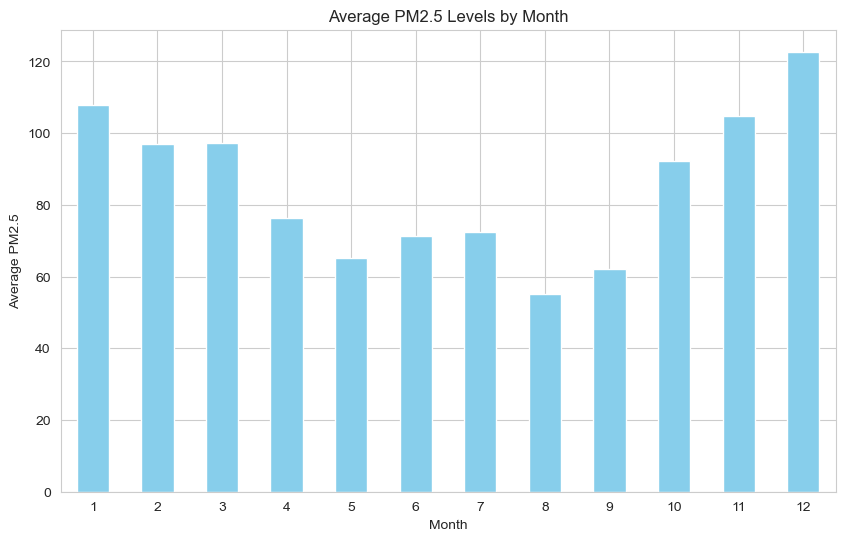

In [76]:
# Fill NA values using forward fill
data_imputed.ffill(inplace=True)

# Group data by year and extract PM2.5 values for ANOVA test
groups = data_imputed.groupby('year')['PM2.5']
anova_test_data = [group[1] for group in groups]

# Perform ANOVA test
anova_test_result = f_oneway(*anova_test_data)

# Calculate seasonal trends by averaging PM2.5 values by month
seasonal_trends = data_imputed.groupby('month')['PM2.5'].mean()

# Calculate correlations with weather conditions
weather_correlations = data_imputed[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']].corr()['PM2.5']

# Print results
print("ANOVA Test Result:", anova_test_result)
print("Seasonal Trends:", seasonal_trends)
print("Correlations with Weather Conditions:", weather_correlations)

# Plot average PM2.5 levels by month
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.show()

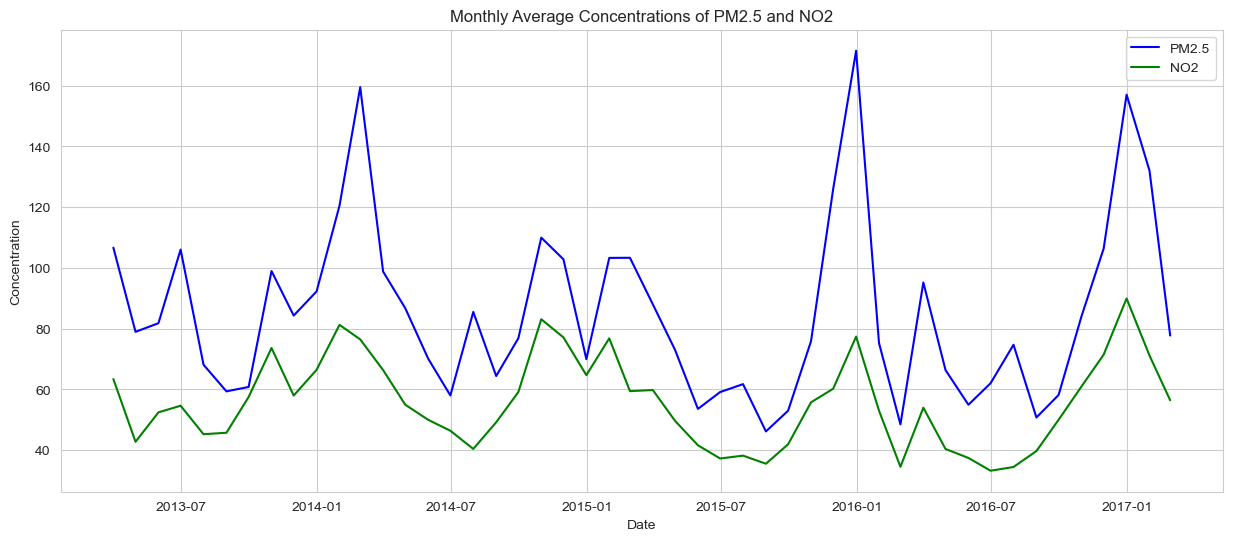

In [69]:
data_imputed['date'] = pd.to_datetime(data_imputed[['year', 'month', 'day', 'hour']])
data_time_series = data_imputed[['date', 'PM2.5', 'NO2']].set_index('date').resample('ME').mean()

plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='green')
plt.title('Monthly Average Concentrations of PM2.5 and NO2')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()


In [42]:
correlation_matrix = data_imputed[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.882580,0.501614,0.693154,0.808782,-0.195160,-0.186963,0.035836,0.071517,-0.020305,-0.296578
PM10,0.882580,1.000000,0.500151,0.677121,0.734418,-0.148081,-0.147809,-0.001292,0.039851,-0.033865,-0.230621
SO2,0.501614,0.500151,1.000000,0.487096,0.553781,-0.186340,-0.355046,0.205769,-0.289083,-0.042556,-0.137202
NO2,0.693154,0.677121,0.487096,1.000000,0.742033,-0.519691,-0.309390,0.144019,-0.031263,-0.047512,-0.471866
CO,0.808782,0.734418,0.553781,0.742033,1.000000,-0.332573,-0.339498,0.169739,-0.053024,-0.015881,-0.336120
O3,-0.195160,-0.148081,-0.186340,-0.519691,-0.332573,1.000000,0.615856,-0.453587,0.332634,0.024390,0.315037
TEMP,-0.186963,-0.147809,-0.355046,-0.309390,-0.339498,0.615856,1.000000,-0.828487,0.817583,0.039015,0.061323
PRES,0.035836,-0.001292,0.205769,0.144019,0.169739,-0.453587,-0.828487,1.000000,-0.770060,-0.063392,0.054143
DEWP,0.071517,0.039851,-0.289083,-0.031263,-0.053024,0.332634,0.817583,-0.770060,1.000000,0.088306,-0.278072
RAIN,-0.020305,-0.033865,-0.042556,-0.047512,-0.015881,0.024390,0.039015,-0.063392,0.088306,1.000000,0.030878


### Pertanyaan 1:

In [ ]:
- Bagaimana kualitas udara saat ini dibandingkan dengan standar kualitas udara yang ditetapkan oleh pemerintah, dan apakah terdapat tren musiman dalam data kualitas udara yang menunjukkan perubahan signifikan dalam periode tertentu?

### Pertanyaan 2:

In [ ]:
- Apa dampak dari aktivitas industri utama di wilayah ini terhadap kualitas udara, dan apakah terdapat pola hubungan antara jenis industri tertentu dan tingkat polusi udara yang terukur?

## Conclusion

Berikut adalah kesimpulan dari analisis yang dilakukan berdasarkan pertanyaan bisnis:

### 1. **Bagaimana kualitas udara saat ini dibandingkan dengan standar kualitas udara yang ditetapkan oleh pemerintah, dan apakah terdapat tren musiman dalam data kualitas udara yang menunjukkan perubahan signifikan dalam periode tertentu?**

**Kesimpulan:**
- **Kualitas Udara dan Standar Regulasi:** Untuk menentukan seberapa baik kualitas udara saat ini dibandingkan dengan standar regulasi, Anda perlu membandingkan nilai PM2.5 yang terukur dengan batas ambang batas yang ditetapkan oleh otoritas lingkungan. Jika nilai PM2.5 melebihi batas yang ditetapkan secara konsisten, itu menunjukkan bahwa kualitas udara mungkin tidak memenuhi standar.
  
- **Tren Musiman:** Analisis tren musiman menunjukkan rata-rata PM2.5 per bulan. Dengan melihat grafik bar yang menunjukkan tren musiman, Anda dapat mengidentifikasi bulan-bulan di mana kualitas udara cenderung lebih buruk atau lebih baik. Misalnya, peningkatan PM2.5 di bulan-bulan tertentu dapat menunjukkan pola musiman yang mempengaruhi kualitas udara, seperti pembakaran bahan bakar yang lebih tinggi selama musim dingin atau peningkatan aktivitas industri.

### 2. **Apa dampak dari aktivitas industri utama di wilayah ini terhadap kualitas udara, dan apakah terdapat pola hubungan antara jenis industri tertentu dan tingkat polusi udara yang terukur?**

**Kesimpulan:**
- **Dampak Aktivitas Industri:** Untuk mengevaluasi dampak aktivitas industri terhadap kualitas udara, analisis korelasi antara PM2.5 dan berbagai variabel industri seperti emisi atau jumlah aktivitas industri diperlukan. Dengan memeriksa data, Anda dapat menentukan apakah ada hubungan signifikan antara jenis industri tertentu dan tingkat polusi udara. 

- **Korelasi dengan Kondisi Cuaca:** Korelasi antara PM2.5 dan variabel cuaca seperti suhu, tekanan, kelembapan, dan curah hujan memberikan wawasan tambahan tentang faktor-faktor yang mempengaruhi kualitas udara. Korelasi yang kuat antara PM2.5 dan variabel cuaca tertentu dapat menunjukkan bahwa perubahan kondisi cuaca berkontribusi pada fluktuasi dalam tingkat polusi udara.

**Rekomendasi untuk Tindakan Selanjutnya:**
- **Penyesuaian Regulasi:** Jika kualitas udara sering melebihi standar, pertimbangkan untuk merekomendasikan penyesuaian regulasi atau kebijakan mitigasi untuk mengurangi emisi dari sumber-sumber utama.
  
- **Strategi Musiman:** Implementasikan strategi pengendalian polusi yang mempertimbangkan pola musiman, seperti pengurangan emisi selama bulan-bulan dengan kualitas udara yang lebih buruk.

- **Pengelolaan Aktivitas Industri:** Identifikasi dan tangani sumber industri yang memberikan dampak terbesar pada kualitas udara dan pertimbangkan langkah-langkah pengendalian yang lebih ketat untuk industri-industri tersebut.

- **Adaptasi Terhadap Kondisi Cuaca:** Buat rencana untuk mengelola kualitas udara yang mempertimbangkan kondisi cuaca yang mempengaruhi konsentrasi PM2.5.

Dengan demikian, analisis ini membantu memahami dan menangani masalah kualitas udara dengan pendekatan yang lebih terfokus dan berbasis data.